<a href="https://colab.research.google.com/github/angelolmg/aprendizagem-maquina/blob/main/1_Regress%C3%A3o_e_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de máquina e mineração de dados (29/02/24)  
## Regressão linear, regessão polinomial e K-Nearest Neighbours

## 1. Regressão linear

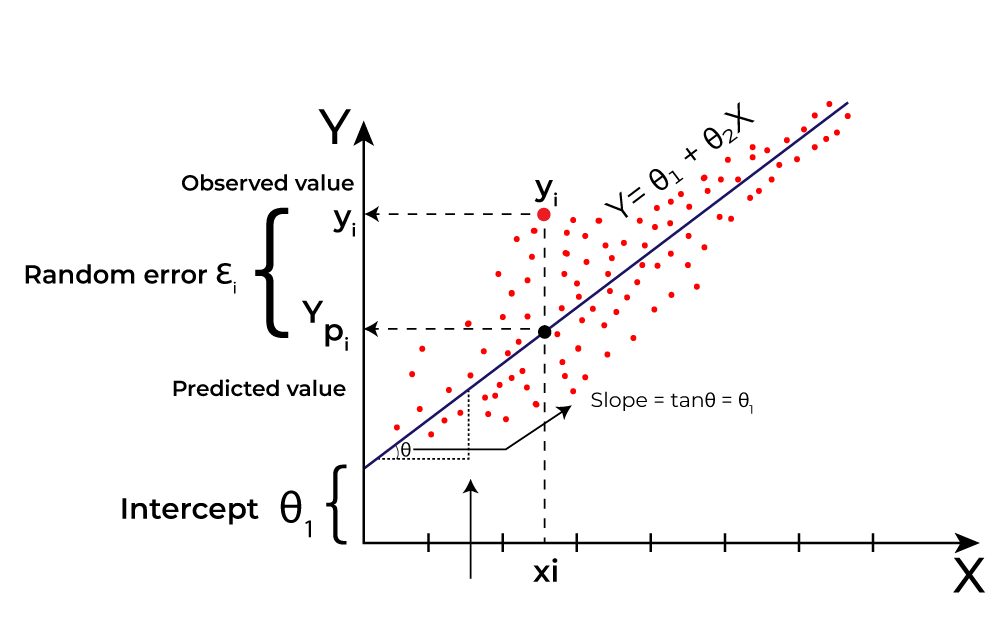

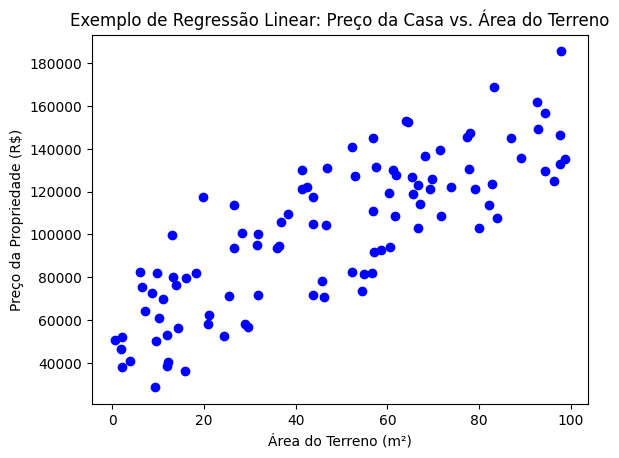

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Gerar alguns dados fictícios para demonstração
np.random.seed(0)
X = 100 * np.random.rand(100, 1)  # Gerar 100 números aleatórios entre 0 e 100 (representando a área do terreno)
y = 50000 + 1000 * X + np.random.randn(100, 1) * 20000  # Criar um relacionamento linear com algum ruído

# Plotar os dados originais e a linha de regressão linear
plt.scatter(X, y, color='blue')
plt.xlabel('Área do Terreno (m²)')
plt.ylabel('Preço da Propriedade (R$)')
plt.title('Exemplo de Regressão Linear: Preço da Casa vs. Área do Terreno')
plt.show()


Inclinação/Slope (Coeficiente): 987.3870042804077
Interceptação/Intercept: 54443.021548944576


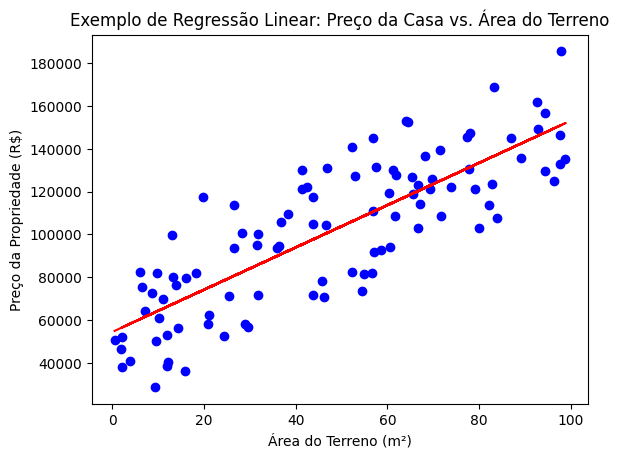

In [27]:
# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
model.fit(X, y)

# Obter os parâmetros da linha de regressão linear
slope = model.coef_[0][0]  # Coeficiente
intercept = model.intercept_[0]  # Interceptação

print("Inclinação/Slope (Coeficiente):", slope)
print("Interceptação/Intercept:", intercept)

# Fazer previsões
y_pred = model.predict(X)

# Plotar os dados originais e a linha de regressão linear
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Área do Terreno (m²)')
plt.ylabel('Preço da Propriedade (R$)')
plt.title('Exemplo de Regressão Linear: Preço da Casa vs. Área do Terreno')
plt.show()

## 2. Regressão polinomial

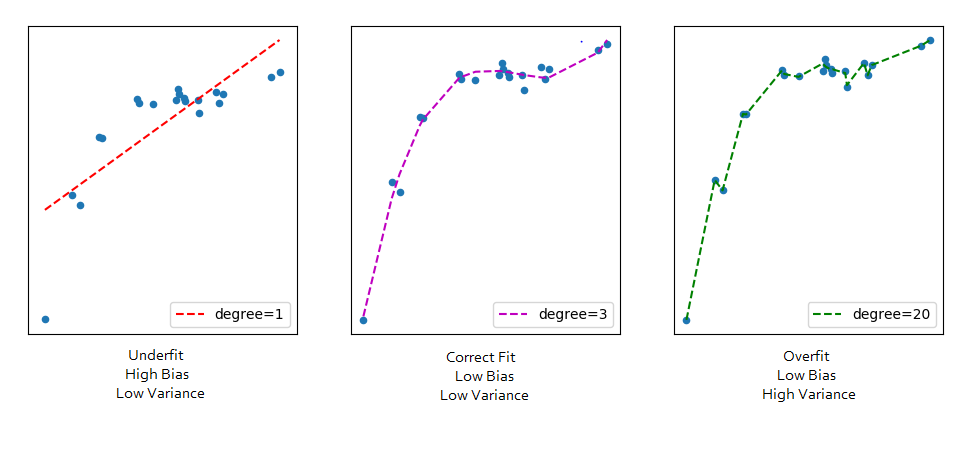

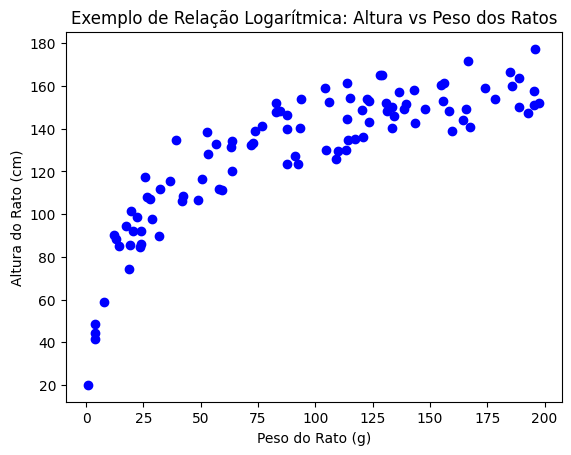

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Gerar alguns dados fictícios para demonstração
np.random.seed(0)
peso = 200 * np.random.rand(100, 1)  # Gerar 100 pesos aleatórios entre 0 e 200 (em gramas)
altura = 30 * np.log(peso + 1) + np.random.randn(100, 1) * 10  # Criar uma relação logarítmica com algum ruído (em centímetros)

# Plotar os dados originais
plt.scatter(peso, altura, color='blue')
plt.xlabel('Peso do Rato (g)')
plt.ylabel('Altura do Rato (cm)')
plt.title('Exemplo de Relação Logarítmica: Altura vs Peso dos Ratos')
plt.show()


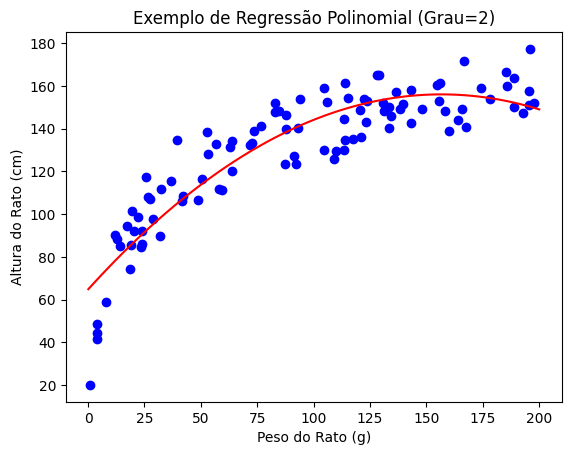

In [33]:
# Transformar a matriz de características de entrada para incluir recursos polinomiais até o grau 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
peso_poly = poly_features.fit_transform(peso)

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
model.fit(peso_poly, altura)

# Classificar os valores de peso antes de traçar
peso_plot = np.linspace(0.1, 200, 100)[:, np.newaxis]
peso_plot_poly = poly_features.transform(peso_plot)

# Fazer previsões
altura_predita = model.predict(peso_plot_poly)

# Plotar os dados originais e a curva de regressão polinomial
plt.scatter(peso, altura, color='blue')
plt.plot(peso_plot, altura_predita, color='red')
plt.xlabel('Peso do Rato (g)')
plt.ylabel('Altura do Rato (cm)')
plt.title('Exemplo de Regressão Polinomial (Grau=2)')
plt.show()

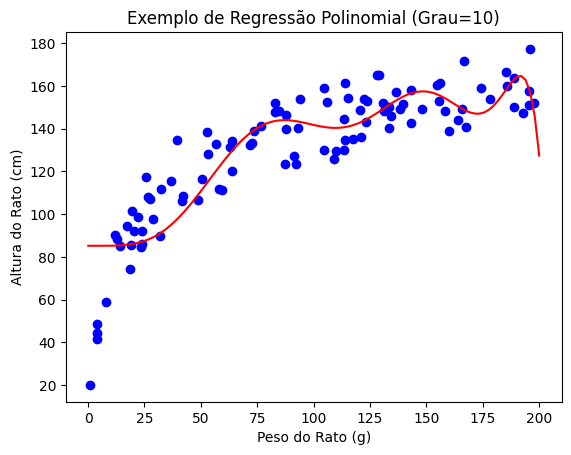

In [38]:
# Transformar a matriz de características de entrada para incluir recursos polinomiais até o grau 2
poly_features = PolynomialFeatures(degree=10, include_bias=False)
peso_poly = poly_features.fit_transform(peso)

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
model.fit(peso_poly, altura)

# Classificar os valores de peso antes de traçar
peso_plot = np.linspace(0.1, 200, 100)[:, np.newaxis]
peso_plot_poly = poly_features.transform(peso_plot)

# Fazer previsões
altura_predita = model.predict(peso_plot_poly)

# Plotar os dados originais e a curva de regressão polinomial
plt.scatter(peso, altura, color='blue')
plt.plot(peso_plot, altura_predita, color='red')
plt.xlabel('Peso do Rato (g)')
plt.ylabel('Altura do Rato (cm)')
plt.title('Exemplo de Regressão Polinomial (Grau=10)')
plt.show()

## 3. Clustering usando K-Nearest Neighbours

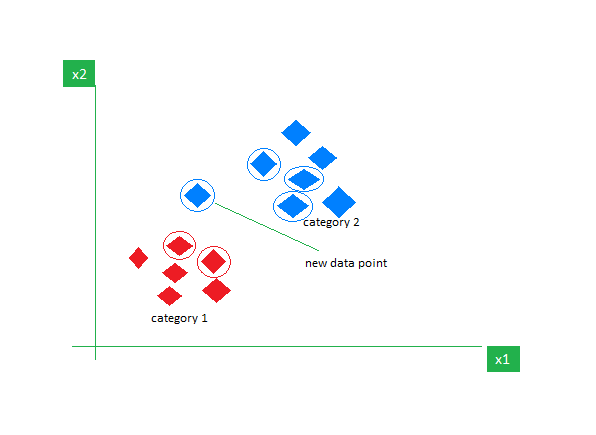

### Dataset iris

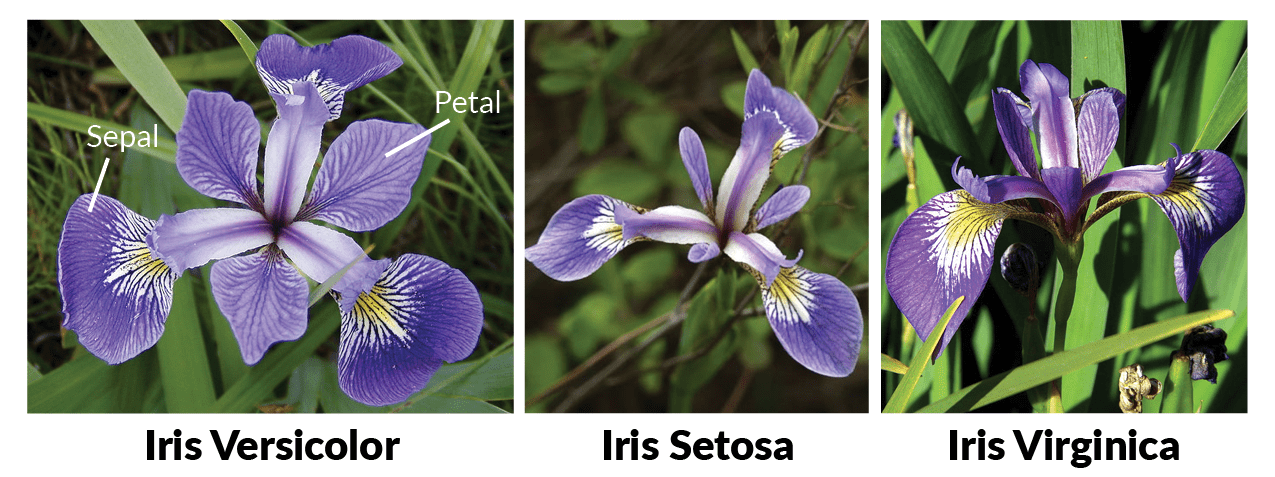

Shape: (150, 4)


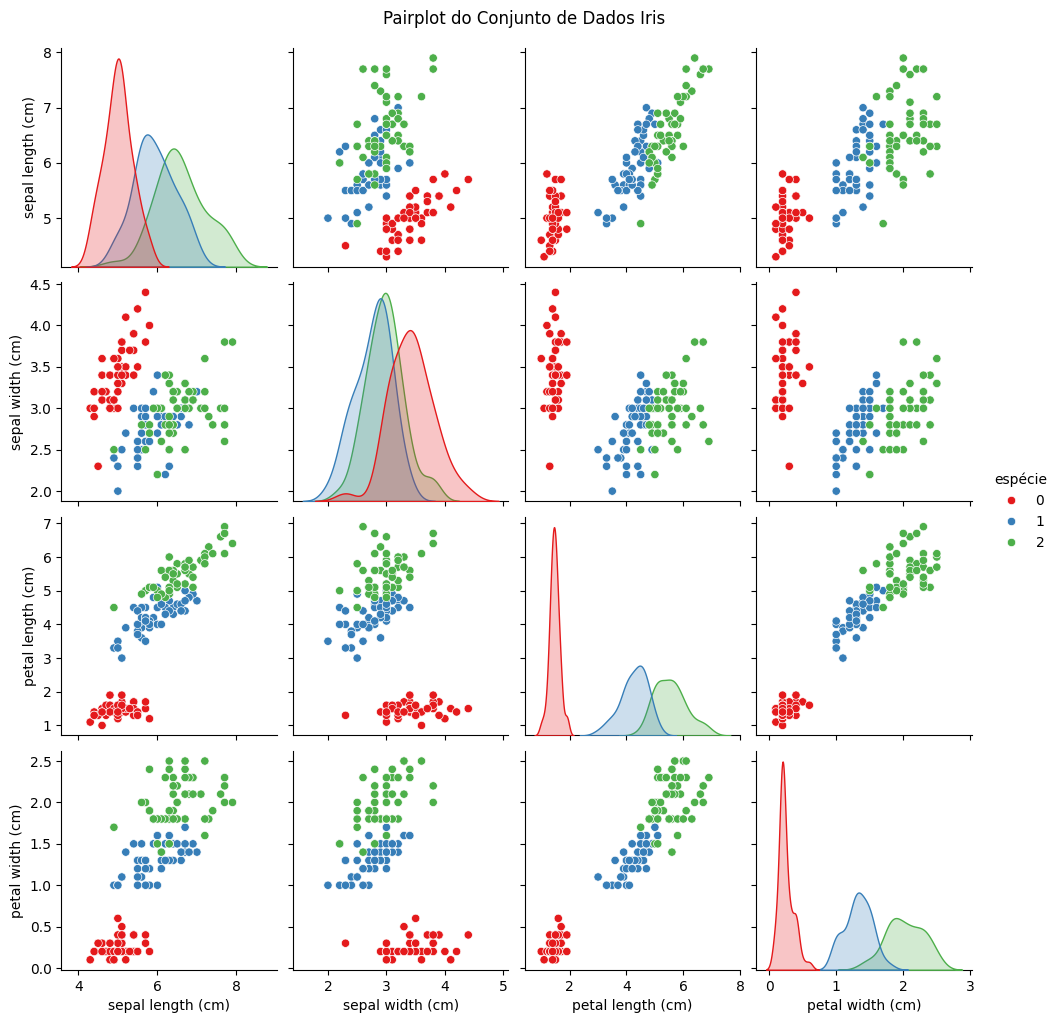

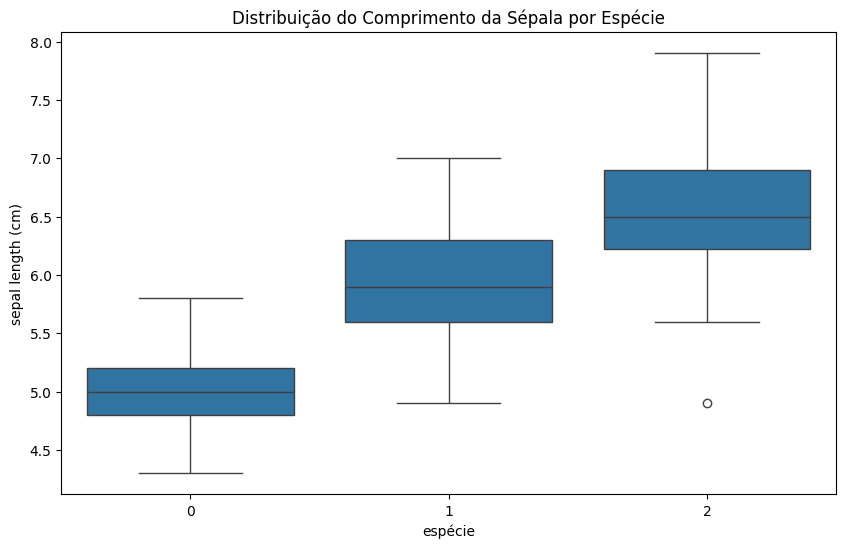

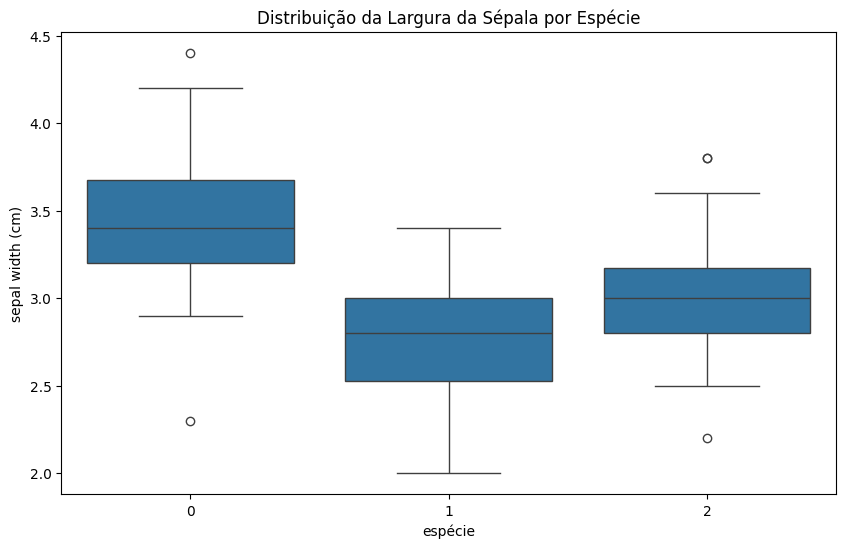

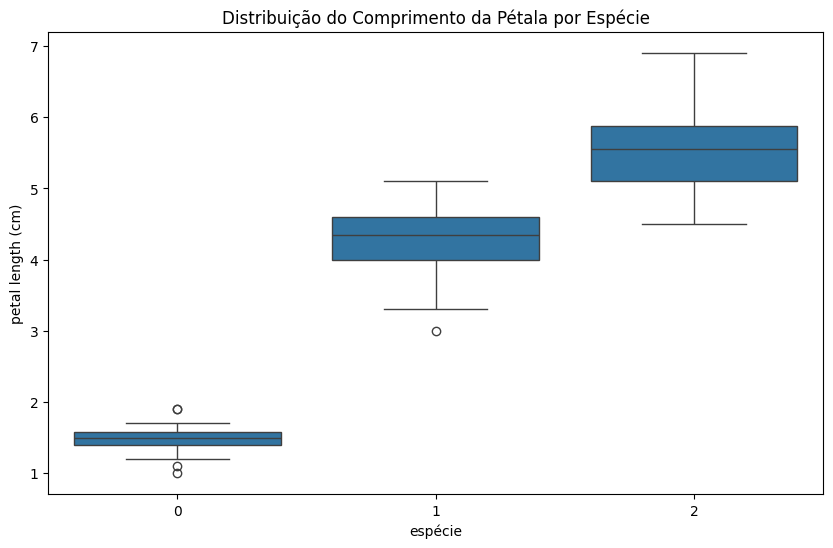

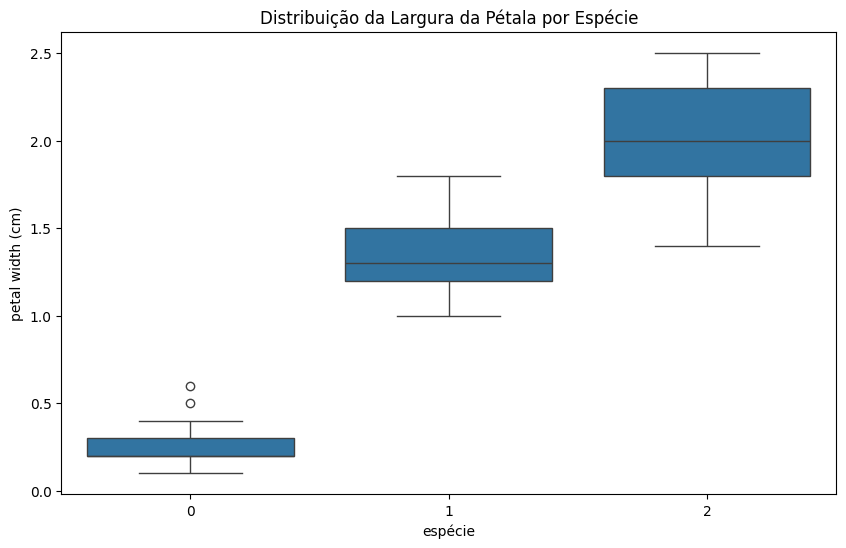

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Variável alvo
feature_names = iris.feature_names

print("Shape:", iris.data.shape)

# Criar um DataFrame para visualização
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['espécie'] = y

# Pairplot para visualizar as relações entre as características
sns.pairplot(iris_df, hue='espécie', palette='Set1')
plt.suptitle("Pairplot do Conjunto de Dados Iris", y=1.02)
plt.show()

# Boxplot para visualizar as distribuições das características por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='espécie', y='sepal length (cm)')
plt.title('Distribuição do Comprimento da Sépala por Espécie')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='espécie', y='sepal width (cm)')
plt.title('Distribuição da Largura da Sépala por Espécie')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='espécie', y='petal length (cm)')
plt.title('Distribuição do Comprimento da Pétala por Espécie')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='espécie', y='petal width (cm)')
plt.title('Distribuição da Largura da Pétala por Espécie')
plt.show()





In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Variável alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a precisão
precisao = accuracy_score(y_test, y_pred)
print("Precisão:", precisao)



Precisão: 1.0


## Links úteis

### Repositórios de datasets públicos
https://archive.ics.uci.edu/  
https://www.kaggle.com/datasets  
https://scikit-learn.org/stable/datasets/toy_dataset.html

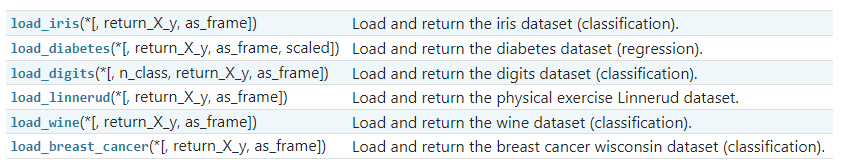